<img src="https://i.imgur.com/XSzy00d.png" style="float:right;width:150px">

**Matplotlib und Widgets**

# Einleitung

## Lernziele

* Sie können ein **Line Chart** erstellen
* Sie können einen **Scatterplot** erstellen
* Sie verstehen, wann sie eher ein Line Chart und wann eher ein Scatterplot verwenden
* Sie kennen Möglichkeiten von **Widgets** zur Erstellung von GUIs
* Sie können auf **Änderungen** in **Widgets** reagieren

# Matplotlib

[Matplotlib](https://matplotlib.org/) ist ein Modul, welches zur Visualisierung von Daten dient. Matplotlib harmoniert insbesondere mit den Modulen NumPy und Pandas aus der letzten Lektion sehr gut. Matplotlib kann sowohl NumPy Arrays als auch Pandas DataFrames visualisieren.

## Grundlegender Aufbau

Matplotlib kann man auf sehr unterschiedliche Arten und Weisen benutzen, das macht dass Nachvollziehen von Beispielen aus dem Internet zuweilen etwas mühsam. Die einfachste Art und Weise funktioniert folgendermassen:

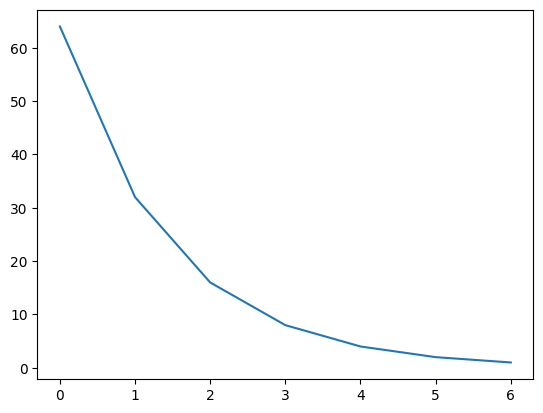

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot([64, 32, 16, 8, 4, 2, 1])

plt.show()

Zuerst muss das [Magic Command](https://ipython.readthedocs.io/en/stable/interactive/magics.html#built-in-magic-commands) `%matplotlib inline` ausgeführt werden, damit die Visualisierungen innerhalb der Zelle wiedergegeben werden. Danach wird das Modul `matplotlib.pyplot` unter dem Namen `plt` importiert. Dies ist eine weitverbreitete Konvention. Die Angabe, was denn überhaupt geplottet werden soll wird mit dem Befehl `plt.plot()` gemacht. Dieser Funktion kann eine Liste mit Zahlen übergeben werden. Falls nur eine Liste übergeben wird, interpretiert Matplotlib die Zahlen so, dass sie als y-Werte entlang der x-Achse beginnend mit x = 0 gezeichnet werden. Mit `plt.show()` kann dann schlussendlich der Plot auch angezeigt werden.

Werden zwei Listen der Funktion `plt.plot()` übergeben, interpretiert Matplotlib diese als x- und y-Werte:

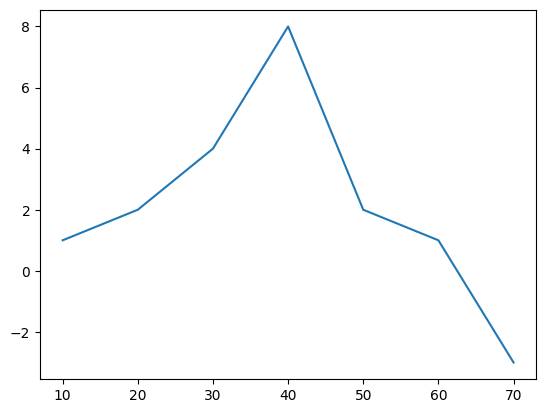

In [2]:
plt.plot([10, 20, 30, 40, 50, 60, 70], [1, 2, 4, 8, 2, 1, -3])
plt.show()

<div class="gk-exercise">

<img src="https://i.imgur.com/JyhBeDB.png" class="gk-exercise-image" style="float:right;width:150px">

<span class="gk-exercise-label">Aufgabe</span> 


Erstelle einen Plot, welcher als y-Werte 100 Zufallszahlen zwischen 0 und 100 darstellt. Führe den Quellcode mehrere male aus, um zu prüfen, ob sich die Zufallszahlen und der Plot dementsprechend tatsächlich ändern.

<details>
<summary>Tipp</summary>
    <p>Hinweis: Es gibt verschiedene Möglichkeiten, eine Liste von Zufallszahlen zu erstellen. Nimm am besten die Funktion <code>random.randint()</code> aus dem Modul NumPy, welches es ermöglicht, nicht nur einzelne Zufallszahlen, sondern ganze Listen davon zu erstellen. Eine Beschreibung zu <code>random.randint()</code> findest du <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html">hier</a>.</p>
</details>
</div>

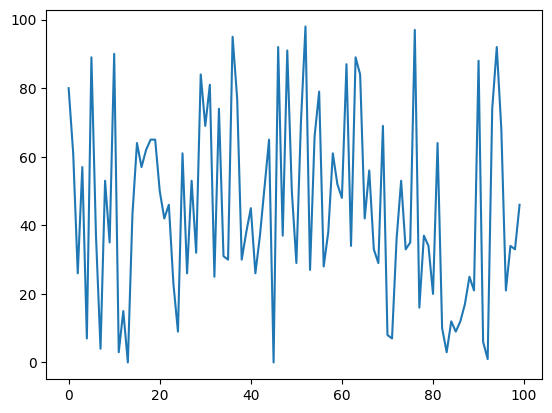

In [3]:
### BEGIN SOLUTION

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.random.randint(low = 0, high = 100, size = 100))

plt.show()

### END SOLUTION

***

## Import von interessanteren Daten

Um möglichst schnell interessantere Daten zu visualisieren, werden nachfolgend Daten zum Verlauf der Covid19 Pandemie von offizieller Seite aufbereitet. Dafür werden CSV Daten aus dem offiziellen Portal des Bundesamts für Gesundheit geladen und in einem Pandas DataFrame gespeichert. Diese Daten resp. die dazugehörigen Metadaten sind übrigens auch im [Open Data Portal der Schweiz](https://opendata.swiss/de/dataset/covid-19-schweiz) zu finden.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

raw_data = pd.read_csv('https://www.covid19.admin.ch/api/data/20230425-qddbkj98/sources/COVID19Cases_geoRegion.csv ', sep = ',')

Um einen Überblick über die Daten zu gewinnen, soll eine Übersicht über die ersten Zeilen und Spalten angezeigt werden.

In [5]:
display(raw_data.head(5))

,geoRegion,datum,entries,sumTotal,timeframe_14d,timeframe_all,offset_last7d,sumTotal_last7d,offset_last14d,sumTotal_last14d,...,inzsum14d,sumdelta7d,inzdelta7d,type,type_variant,version,datum_unit,entries_letzter_stand,entries_neu_gemeldet,entries_diff_last
0,CH,2020-02-24,1,1,False,True,4385008,0,4383801,0,...,NaN,NaN,NaN,COVID19Cases,NaN,2023-01-24_06-03-16,day,1,0,914
1,CH,2020-02-25,1,2,False,True,4385008,0,4383801,0,...,NaN,NaN,NaN,COVID19Cases,NaN,2023-01-24_06-03-16,day,1,0,914
2,CH,2020-02-26,10,12,False,True,4385008,0,4383801,0,...,NaN,NaN,NaN,COVID19Cases,NaN,2023-01-24_06-03-16,day,10,0,914
3,CH,2020-02-27,10,22,False,True,4385008,0,4383801,0,...,NaN,NaN,NaN,COVID19Cases,NaN,2023-01-24_06-03-16,day,10,0,914
4,CH,2020-02-28,10,32,False,True,4385008,0,4383801,0,...,NaN,NaN,NaN,COVID19Cases,NaN,2023-01-24_06-03-16,day,10,0,914


Die interessanten Daten sind in den ersten Spalten zu finden: 'geoRegion' bezeichnet den Kanton resp. die ganze Schweiz, 'datum' bezeichnet den einzelnen Tag und 'entries' ist die gemeldete Anzahl von Covid Infektionen. Um mit diesen Daten besser zu arbeiten, sollen zwei DataFrames erstellt werden, eines mit Angaben zum Kanton Bern, das andere zum Kanton Zürich. Es sollen nur die Spalten 'datum' und 'entries' weiterverwendet werden:

In [6]:
# Filtern
zh_data = raw_data[raw_data.geoRegion == "ZH"]

# nur bestimmte Spalten übernehmen 
zh_data = zh_data[["datum", "entries"]]

be_data = raw_data[raw_data.geoRegion == "BE"]
be_data = be_data[["datum", "entries"]]

display(zh_data.tail(5))
display(be_data.tail(5))

,datum,entries
30242,2022-12-28,178
30243,2022-12-29,198
30244,2022-12-30,162
30245,2022-12-31,94
30246,2023-01-01,36


,datum,entries
6253,2022-12-28,128
6254,2022-12-29,121
6255,2022-12-30,86
6256,2022-12-31,60
6257,2023-01-01,13


## Line Chart

Die wohl fundamentalste Visualisierung ist das Liniendiagramm (Line Chart). Ein Liniendiagramm macht dann Sinn, wenn bestimmte Beobachtungen sich entlang einer kontinuierlichen Grösse verändern. Ein ganz typisches Beispiel ist die Zeitreihenanalyse (Time Series), bei der eine bestimmte Grösse entlang einer Zeitachse betrachtet wird.

Eine solche Zeitreihenalayse soll nun mit den Corona Daten durchgeführt werden:

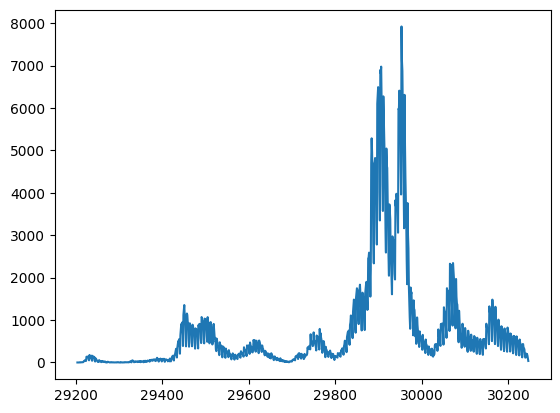

In [7]:
plt.plot(zh_data["entries"])
plt.show()

`zh_data["entries"]` gibt die Spalte für die Ansteckungen aus dem DataFrame. 

Dies ist zwar keine Liste, wie folgender Code zeigt:

In [8]:
type(zh_data["entries"])

pandas.core.series.Series

Aber wie schon erwähnt, Matplotlib arbeitet gut mit Objekten aus NumPy und Pandas zusammen, deshalb kann hier der Datentyp der `Series` sofort geplottet werden.

Wenig hilfreich ist noch die Angabe auf der x-Achse, welches die Zeilenzahl des ursprünglichen DataFrames darstellt. Aber hier soll natürlich das Datum angezeigt werden:

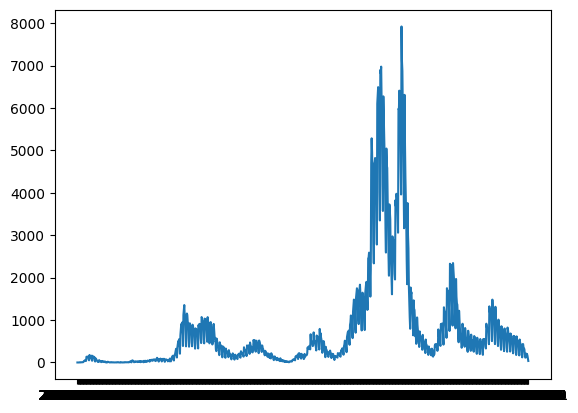

In [9]:
plt.plot(zh_data["datum"], zh_data["entries"])
plt.show()

Das dauert ziemlich lange und schlussendlich ist die Ausgabe nicht besonders hilfreich. Der Grund dafür ist, dass die Werte von 'Datum' für Menschen natürlich sofort als Datum erkennbar sind, der Computer weiss zuerst aber mal nicht, dass er dies als Datumswerte interpretieren soll. Das muss dem Computer zuerst mitgeteilt werden:

In [10]:
zh_data["datum"] = pd.to_datetime(zh_data["datum"])
zh_data.info()
zh_data.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 29204 to 30246
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   datum    1043 non-null   datetime64[ns]
 1   entries  1043 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 24.4 KB


,datum,entries
29204,2020-02-24,0
29205,2020-02-25,0
29206,2020-02-26,1
29207,2020-02-27,1
29208,2020-02-28,0


Mit der Funktion `to_datetime()` können die bisherigen Strings in "echte" Zeitdaten verwandelt werden. Die Funktion `info()` liefert die Datentypen für jede Spalte eines DataFrames, wo jetzt erkennbar ist, dass die Spalte 'datum' nun ein `datetime64` Objekt ist. Bei der Darstellung über `head()` ist der Unterschied allerdings nicht sichtbar. Wenn jetzt nochmals der Plot gezeichnet wird, passt die Beschriftung der x-Achse:

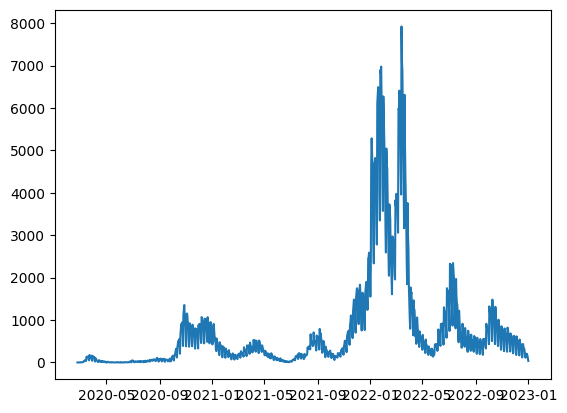

In [11]:
plt.plot(zh_data["datum"], zh_data["entries"])
plt.show()

Jetzt sollt ein Plot erstellt werden, bei dem gleichzeitig die Zahlen aus Zürich und Bern sichtbar sind:

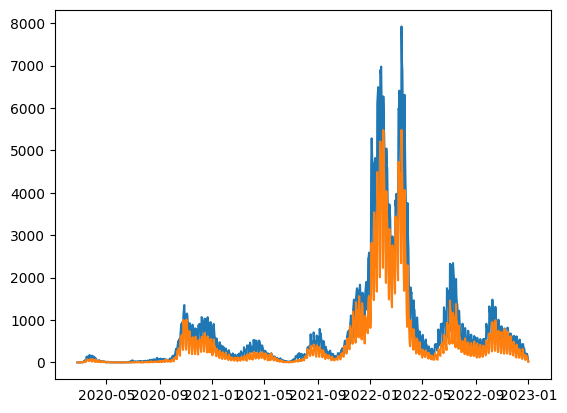

In [12]:
be_data["datum"] = pd.to_datetime(be_data["datum"])
plt.plot(zh_data["datum"], zh_data["entries"], be_data["datum"], be_data["entries"])
plt.show()

Es ist also möglich, bei der Funktion `plot()` einfach weitere x/y Datenpaare anzugeben, die dann übereinandergelegt gezeichnet werden.

Nun soll der Plot mit weiteren Zusatzangaben verfeinert werden:

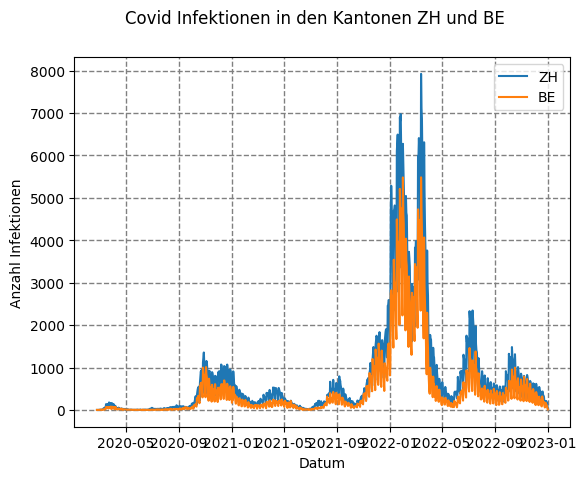

In [13]:
plt.plot(zh_data["datum"], zh_data["entries"], be_data["datum"], be_data["entries"])
plt.suptitle("Covid Infektionen in den Kantonen ZH und BE")
plt.xlabel("Datum")
plt.ylabel("Anzahl Infektionen")
plt.legend(["ZH", "BE"])
plt.grid(color = "grey", linestyle = "--", linewidth=1)
plt.show()

Die Grösse der ausgegebenen Grafik lässt sich über `plt.rcParams['figure.figsize'] = [x, y]` anpassen:

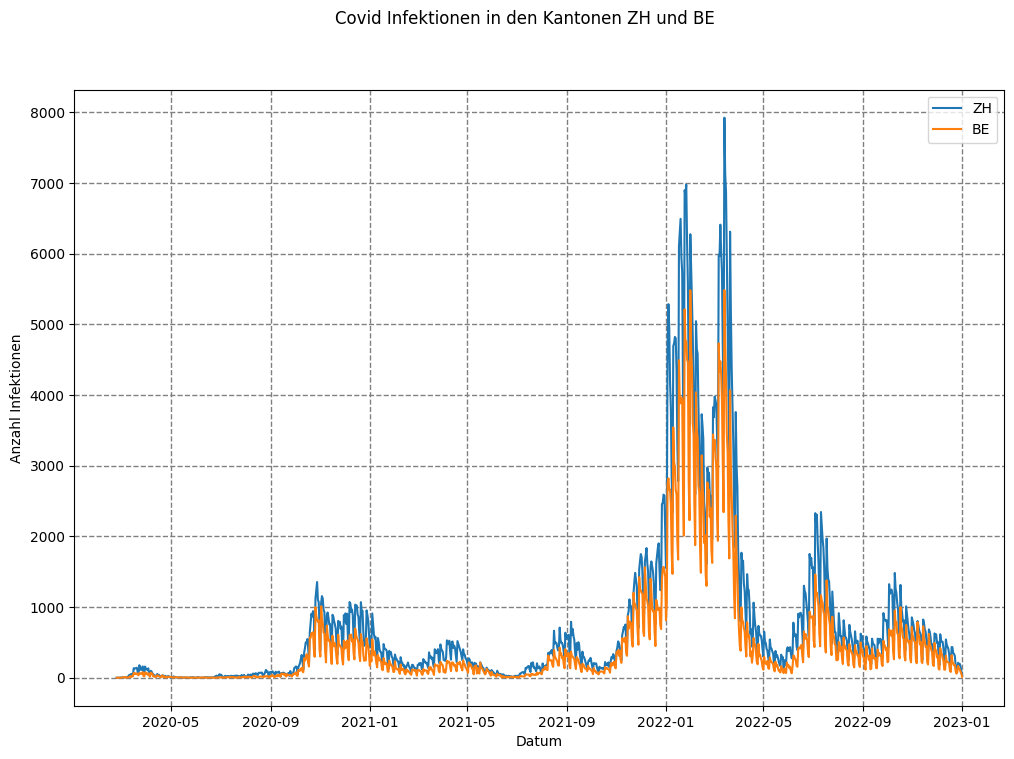

In [14]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(zh_data["datum"], zh_data["entries"], be_data["datum"], be_data["entries"])
plt.suptitle("Covid Infektionen in den Kantonen ZH und BE")
plt.xlabel("Datum")
plt.ylabel("Anzahl Infektionen")
plt.legend(["ZH", "BE"])
plt.grid(color = "grey", linestyle = "--", linewidth=1)
plt.show()

Die Grafiken können einfach auf dem Computer gespeichert werden, indem mit 'Shift + Rechtsklick' auf die Grafik geklickt und dann 'Grafik speichern unter...' gewählt wird.

<div class="gk-exercise">

<img src="https://i.imgur.com/JyhBeDB.png" class="gk-exercise-image" style="float:right;width:150px">

<span class="gk-exercise-label">Aufgabe</span> 

Schau dir die Daten unter [data/linedata.csv](data/linedata.csv) an. Versuche Regelmässigkeiten in den Daten zu erkennen. Zeichne die Daten dann als schön gestaltetes Liniendigramm mit den 'Monat' Werten als x-Achse und den 'Anzahl' Werten als y-Achse. Hast du eine Idee, was die Zahlen abbilden könnten? Schau dir dazu insbesondere die Werte nach September 2001 und die Werte im Frühjahr 2020 an.

<details>
<summary>Tipp</summary>
    <p>Denke daran, die Spalte 'Monat' in echte Datumswerte zu verwandeln.</p>
</details>
</div>

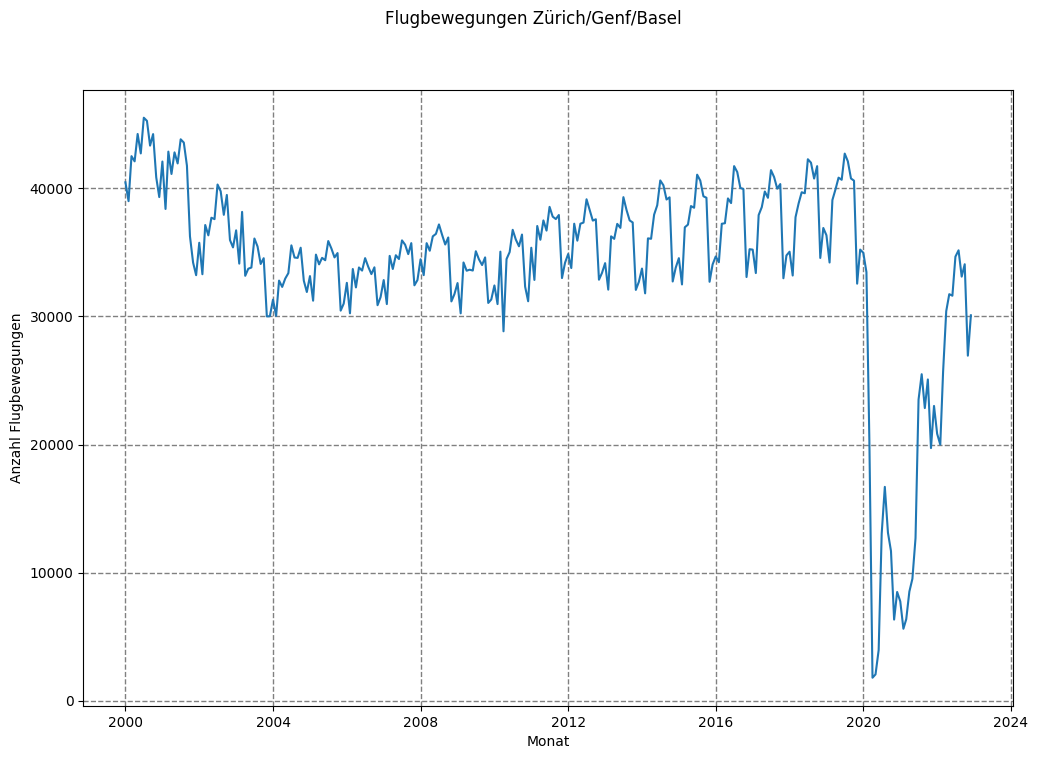

In [15]:
### BEGIN SOLUTION

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

flights = pd.read_csv("data/linedata.csv", sep = ";")

flights["Monat"] = pd.to_datetime(flights["Monat"])

plt.rcParams['figure.figsize'] = [12, 8]

plt.plot(flights["Monat"], flights["Anzahl"])

plt.suptitle("Flugbewegungen Zürich/Genf/Basel")
plt.xlabel("Monat")
plt.ylabel("Anzahl Flugbewegungen")
plt.grid(color = "grey", linestyle = "--", linewidth=1)
plt.show()

### END SOLUTION

Die Zahlen stellen die Anzahl Flugbewegungen (Starts und Landungen) ab den Flughäfen Zürich/Genf/Basel (Summe) dar. Mehr Infos zu diesen Zahlen gibt es [hier](https://www.pxweb.bfs.admin.ch/pxweb/de/px-x-1107020000_101/-/px-x-1107020000_101.px/).

***

## Scatterplot

Das **Streudiagramm** ist ein weiterer wichtiger Visualisierungstyp. Es kommt dann zum Einsatz, wenn ein allfälliger Zusammenhang (Korrelation) zwischen zwei Variablen einer Beobachtung untersucht werden soll. Beim Streudiagramm werden Wertepaare in einem x-y Koordinatensystem abgebildet. Die Werte der Variablen stehen dabei nicht in einem kontinuerlichen Zusammenhang (im Gegensatz bspw. zu einer Zeitreihe, wo die verschiedenen x-Werte (Zeiten) in einer Abfolge stehen und es deshalb Sinn macht, eine verbindende Linie zu zeichnen).

Nachfolgend sollen Daten zum Geysir "[Old Faithful](https://de.wikipedia.org/wiki/Old_Faithful)" im Yellowstone National Park untersucht werden. Eine CSV Datei ist unter [data/old_faithful.csv](data/old_faithful.csv) verfügbar. Diese beinhaltet zwei Spalten. In der einen Spalte ('duration') wird die Dauer eines Ausbruchs in Minuten angegeben, in der zweiten Spalte ('waiting') die anschliessend erfolgte Wartezeit in Minuten bis zum nächsten Ausbruch.

Die Frage ist nun, ob diese zwei Grössen in irgendeinem Zusammenhang stehen. Dies kann versucht werden, indem die zwei Spalten angezeigt werden:

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

old_faithful = pd.read_csv("data/old_faithful.csv", sep = ";")

display(old_faithful.head(50))

,duration,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
5,2.883,55
6,4.700,88
7,3.600,85
8,1.950,51
9,4.350,85


Es ist ziemlich schwierig, eine so grosse Anzahl Zahlen auf einen Blick zu erfassen und Muster zu erkennen. Viel einfacher geht es mit einer Visualisierung:

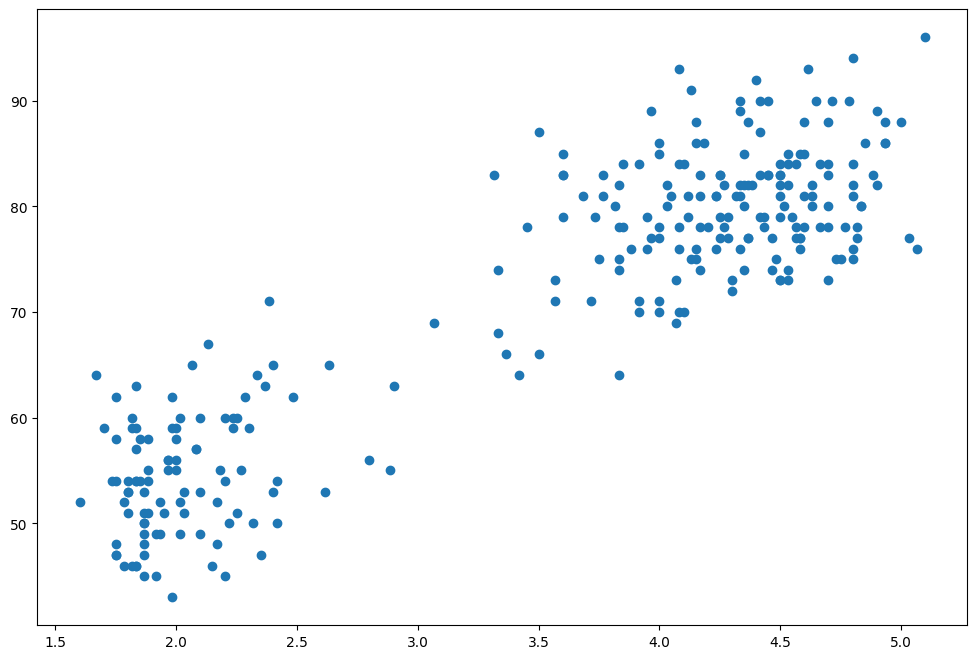

In [17]:
plt.scatter(old_faithful["duration"], old_faithful["waiting"])
plt.show()

Dank diesem Streuplot wird ersichtlich, dass es zwei "Cluster" gibt, die sich dadurch auszeichnen, dass bei einem kurzen Ausbruch tendenziell eine kurze Wartezeit folgt, während nach einem langen Ausbruch auch eine lange Wartezeit folgt.

Sollen bei einem Streudiagramm mehrere Datensätze gleichzeitig in einem Diagramm abgebildet werden, kann die `plt.scatter()` Funktion einfach mehrmals mit unterschiedlichen Daten aufgerufen werden. Innerhalb der gleichen Zelle werden dann alle Daten in einem Diagramm dargestellt. Somit können wir den Scatterplot noch etwas übersichtlicher darstellen, in dem wir die beiden "Cluster" unterschiedlich einfärben:

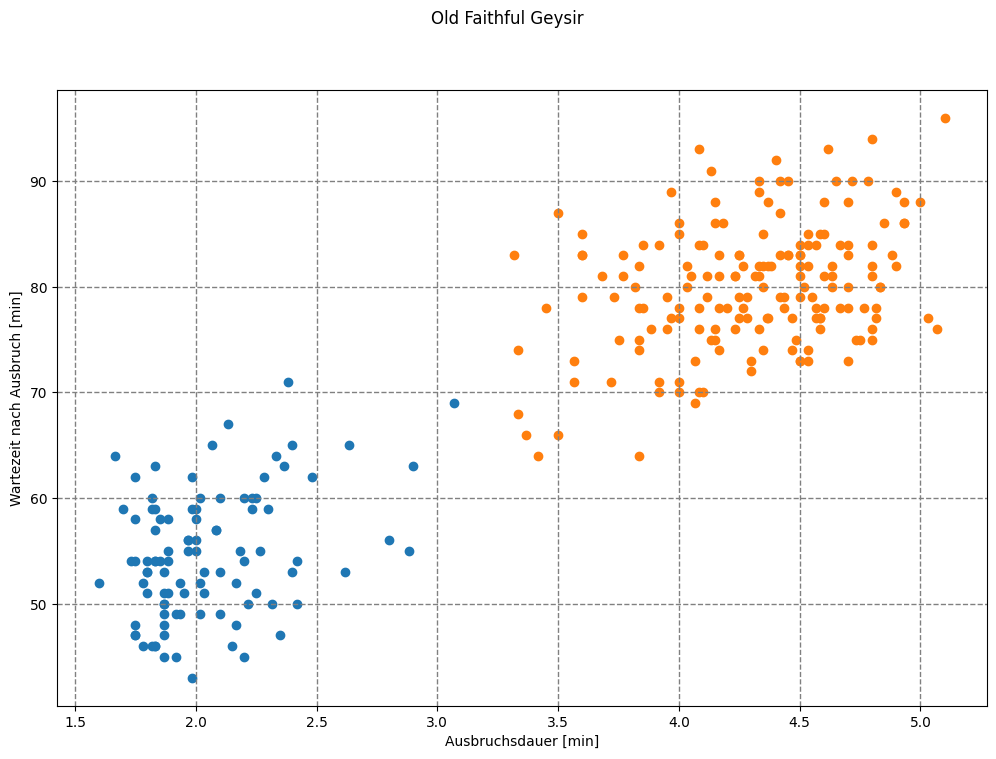

In [18]:
old_faithful_short = old_faithful[old_faithful.duration <= 3.25]
old_faithful_long = old_faithful[old_faithful.duration > 3.25]

plt.rcParams['figure.figsize'] = [12, 8]

plt.scatter(old_faithful_short["duration"], old_faithful_short["waiting"])
plt.scatter(old_faithful_long["duration"], old_faithful_long["waiting"])
plt.suptitle("Old Faithful Geysir")
plt.xlabel("Ausbruchsdauer [min]")
plt.ylabel("Wartezeit nach Ausbruch [min]")
plt.grid(color = "grey", linestyle = "--", linewidth=1)

plt.show()

# Widgets

Widgets sind kleine grafische Elemente, welche die Ein- und Ausgabe vereinfachen. Damit dienen sie dazu, eine Art **Grafical User Interface** (GUI) zu erstellen. Um mit Widgets zu arbeiten, muss das entsprechende Modul `ipywidgets` importiert werden:

In [19]:
import ipywidgets as widgets

Typischerweise werden die Widgets einer Variable zugewiesen, damit man sie anzeigen, auslesen und verändern kann:

In [20]:
w = widgets.IntSlider()

Mit der Funktion `display()` können die Widgets im Output angezeigt werden. Die Zelle muss also immer ausgeführt werden, damit das Widget angezeigt wird.

In [21]:
display(w)

IntSlider(value=0)

Der Wert, der mit dem Schieberegler eingestellt wird, kann mit der Eigenschaft `value` des Widget Objekts ausgelesen werden:

In [22]:
print("Der Wert des Reglers ist:" + str(w.value))

Der Wert des Reglers ist:0


## Reagieren auf Änderungen von Widgets

Soll beispielsweise beim Drücken eines Buttons sofort eine Aktion ausgelöst werden (ohne dass dafür das Ausführen einer weiteren Zelle notwendig ist), ist ein etwas aufwändigeres Vorgehen nötig: 

In [23]:
button = widgets.Button(description="Klick mich!")
output = widgets.Output()

display(button, output)

def button_clicked(b):
    with output:
        print("Der Knopf '" + b.description +  "' wurde gedrückt")

button.on_click(button_clicked)

Button(description='Klick mich!', style=ButtonStyle())

Output()

Zuerst wird ein Button und ein spezielles Output Widget erzeugt, diese werden dann beide über `display()` angezeigt, wobei vom Output vorerst noch nichts zu sehen ist. Dann wird eine Funktion `button_clicked(b)` definiert, welche etwas tun soll, sobald der Button gedrückt wird. Anschliessend wird mit `button.on_click(button_clicked)` dem Button bei einem Klick diese Funktion zugewiesen.

Bei dieser Konstruktion wird der Funktion, die bei einem Klick aufgerufen wird, also der Funktion `button_clicked()` automatisch ein Argument übergeben, das Informationen über den gedrückten Knopf enthält, die Funktion muss also über einen Parameter verfügen, um dieses Argument aufzunehmen. Im Falle des Buttons kann auf die Eigenschaft `description` des gedrückten Buttons zugegriffen werden, das die Beschriftung des Buttons enthält.

Da es mit dieser Konstruktion nicht möglich ist, per einfachem `print()` Befehl einen Output zu erzeugen, brauchen wir das Output Widget, welches innerhalb der Funktion mit Hilfe des Schlüsselwortes `with` in einem sogenannten *Context Manager* (genau wie beim Arbeiten mit Dateien) aufgerufen wird.

Das Dropdown Widget ist eine weitere interessante Möglichkeit:

In [24]:
dropdown = widgets.Dropdown(
    options = ["Bern", "Biel", "Thun"],
    description = "Stadt")

display(dropdown)

Dropdown(description='Stadt', options=('Bern', 'Biel', 'Thun'), value='Bern')

Um auf die Wahl aus dem Dropdown Widget zu reagieren, kann die oben verwendete Methodik, leicht angepasst, angewandt werden:

In [25]:
dropdown = widgets.Dropdown(
    options = ["Bern", "Biel", "Thun"],
    description = "Stadt")

output = widgets.Output()

display(dropdown, output)

def on_value_change(change):
    with output:
        print(change)
        
dropdown.observe(on_value_change, names = "value")

Dropdown(description='Stadt', options=('Bern', 'Biel', 'Thun'), value='Bern')

Output()

Um den Wechsel des Dropdown Menus zu überwachen, können wir die Methode `observe` anwenden. Diese braucht zwei Argumente, nämlich die Funktion, die bei einem Wechsel ausgelöst werden soll (hier `on_value_change()` und als zweites Argument, was genau überwacht werden soll. Das ist für ein Dropdown Widget typischerweise die Werte, also `names = 'value'`. Das Parameter Objekt, das beim Wechsel des Dropdown Widgets der Funktion `on_value_change` übergeben wird, ist ein Dictionary, das verschiedene Schlüssel-Wert Paare beinhaltet, der interessante Wert dabei ist `new` für den neu ausgewählten Eintrag.

## Weitere Infos zu Widgets

Eine gute Dokumentation zu den Widgets ist unter [https://ipywidgets.readthedocs.io](https://ipywidgets.readthedocs.io/en/stable/index.html) verfügbar.

# Schlussaufgabe - Aufwändig aber lehrreich!

<div class="gk-exercise">

<img src="https://i.imgur.com/JyhBeDB.png" class="gk-exercise-image" style="float:right;width:150px">

<span class="gk-exercise-label">Aufgabe</span> 

Erstelle eine Datenvisualisierung von internationalen Covid-Daten (CSV für die entsprechenden Daten: https://covid19.who.int/WHO-COVID-19-global-data.csv). Dabei soll zuerst mit Hilfe eines Dropdown Widget ein Land ausgewählt werden, von dem dann anschliessend die Daten angezeigt werden sollen. Die mögliche Länderauswahl im Dropdown Widget soll dabei direkt aus den Daten eingelesen werden. Es sollen sowohl die Anzahl Infizierter als auch die Anzahl der Todesfälle gleichzeitig angezeigt werden.

<details>
<summary>Tipps:</summary>
    <p>Lass Dir die ersten paar Einträge des CSV mit Hilfe von <code>head()</code> anzeigen.</p>
    <details>
    <summary>Tipp:</summary>
    <p>Um alle vorkommenden Werte aus einer Spalte eines Pandas Dataframe zu erhalten und in eine Liste umzuwandeln, können die Methoden <code>unique()</code> und <code>tolist()</code> auf die Spalte angewandt werden, also bspw. <code>df["Spaltenname"].unique().tolist()</code></p>
    </details>
    <details>
    <summary>Tipp:</summary>
    <p>Nach Auswahl aus dem Dropdown Widget erstelle ein gefiltertes Dataframe basierend auf der Auswahl</p>
    </details>
    <details>
    <summary>Tipp:</summary>
    <p>Am besten werden zwei y-Achsen erzeugt (je eine links und eine rechts), da die Zahlen der Infizierten und der Todesfälle sehr unterschiedlich sind. Dies kann mit Hilfe von <code>plt.twinx()</code> geschehen.</p>
    </details>
</details>

</div>

In [26]:
### BEGIN SOLUTION

import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

covid_data = pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-data.csv")
covid_data["Date_reported"] = pd.to_datetime(covid_data["Date_reported"])

countries = covid_data["Country"].unique().tolist()

dropdown = widgets.Dropdown(
    options = countries,
    description = "Land")

output = widgets.Output()

display(dropdown, output)

def on_value_change(change):
    with output:
        output.clear_output()
        country_data = covid_data[covid_data["Country"] == change["new"]]
        plt.plot(country_data["Date_reported"], country_data["New_cases"], color = "blue")
        plt.ylabel("Infizierte", color = "blue")
        plt.grid(color = "blue", linestyle = "--", linewidth=1)
        plt.twinx()
        plt.plot(country_data["Date_reported"], country_data["New_deaths"], color = "orange")
        plt.ylabel("Todesfälle", color = "orange")
        plt.grid(color = "orange", linestyle = "-.", linewidth=1)
        plt.rcParams['figure.figsize'] = [12, 8]
        plt.suptitle("Covid: " + change["new"])
        plt.xlabel("Datum")
        plt.show()
        
dropdown.observe(on_value_change, names = "value")

### END SOLUTION

Dropdown(description='Land', options=('Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angol…

Output()

***

# Zusammenfassung

In diesem Notebook wurde aufgezeigt, wie aus Daten Visualisierungen erstellt werden können. Damit wurde auch aufgezeigt, dass gewisse Strukturen in Daten mit Hilfe einer Visualisierung sehr viel schneller erkennbar sind als beim Blick auf die Rohdaten.

Die beiden wichtigen Typen Line Chart und Scatterplot wurden eingeführt und es ist aufgezeigt worden, wann diese zum Einsatz kommen können.

Schliesslich wurde die Möglichkeit der Widgets aufgezeigt. Diese eignen sich gut, um Eingaben von der Benutzerin abzuholen oder als Möglichkeit zur Ausgabe eines Resultates aus dem Programmablauf.

# Impressum

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons Lizenzvertrag" style="border-width:0" src="https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg" /></a><br />Dieses Werk ist lizenziert unter einer <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Namensnennung - Weitergabe unter gleichen Bedingungen 4.0 International Lizenz</a>.

Autoren: [Noe Thalheim](mailto:noe.thalheim@bfh.ch), [Benedikt Hitz-Gamper](mailto:benedikt.hitz@unibe.ch)

## Credits

* [Covid Daten Schweiz](https://opendata.swiss/de/dataset/covid-19-schweiz)
* [Covid Daten International](https://covid19.who.int/data)
* [Daten zu Flugbewegungen](https://www.pxweb.bfs.admin.ch/pxweb/de/px-x-1107020000_101/-/px-x-1107020000_101.px/)
* [Old Faithful Daten](https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat)

```
There are 10 types of people in the world.
Those who understand binary, and those who don't.
```